<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/da05_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 모듈 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 준비

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box Plot

In [6]:
tips.total_bill.describe()

,total_bill
count,244.000000
mean,19.785943
std,8.902412
min,3.070000
25%,13.347500
50%,17.795000
75%,24.127500
max,50.810000


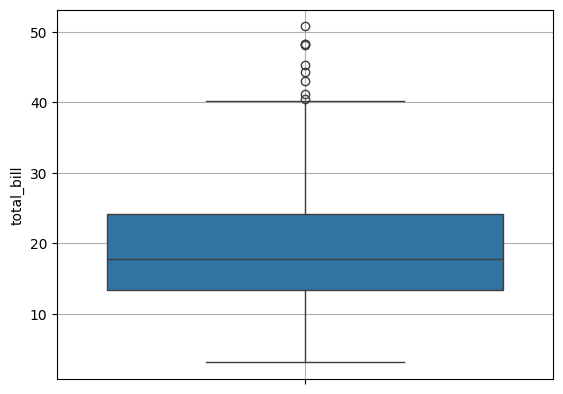

In [7]:
sns.boxplot(data=tips, y='total_bill')
plt.grid()
plt.show()

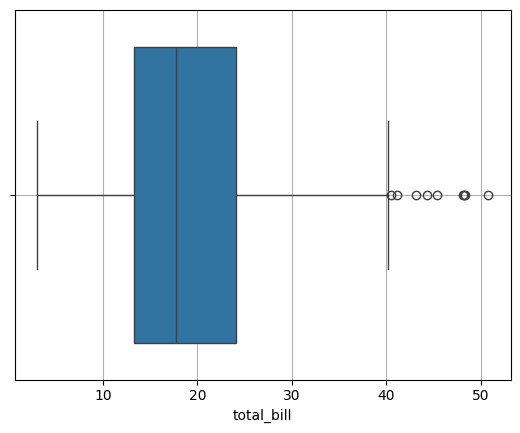

In [8]:
sns.boxplot(data=tips, x='total_bill')
plt.grid()
plt.show()

## 성별 팁의 box plot

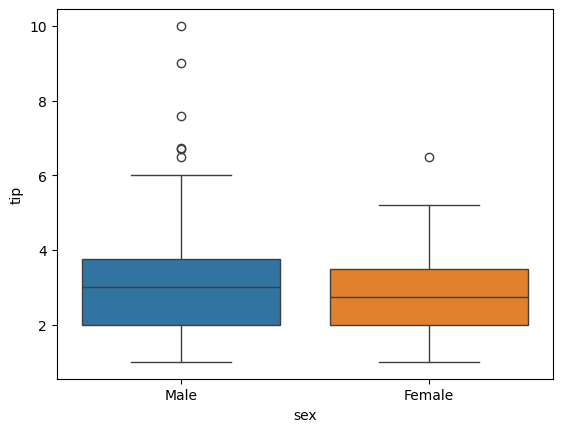

In [10]:
sns.boxplot(data=tips, x='sex', y='tip', hue='sex')
plt.show()

In [11]:
tips[tips.sex == 'Male'].tip.describe()

,tip
count,157.000000
mean,3.089618
std,1.489102
min,1.000000
25%,2.000000
50%,3.000000
75%,3.760000
max,10.000000


In [12]:
tips[tips.sex == 'Female'].tip.describe()

,tip
count,87.000000
mean,2.833448
std,1.159495
min,1.000000
25%,2.000000
50%,2.750000
75%,3.500000
max,6.500000


## 흡연 여부별 팁의 box plot

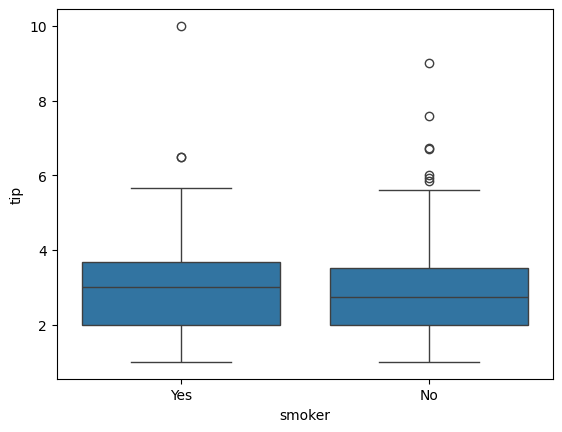

In [13]:
sns.boxplot(data=tips, x='smoker', y='tip')
plt.show()

## 요일별 팁의 box plot

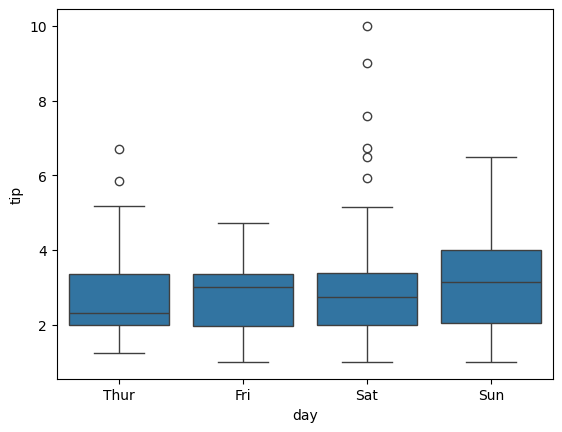

In [14]:
sns.boxplot(data=tips, x='day', y='tip')
plt.show()

## 시간별 팁의 box plot

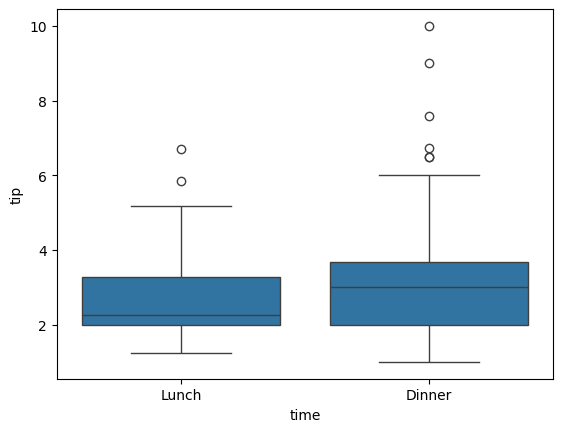

In [15]:
sns.boxplot(data=tips, x='time', y='tip')
plt.show()

## 요일별, 성별 팁의 box plot

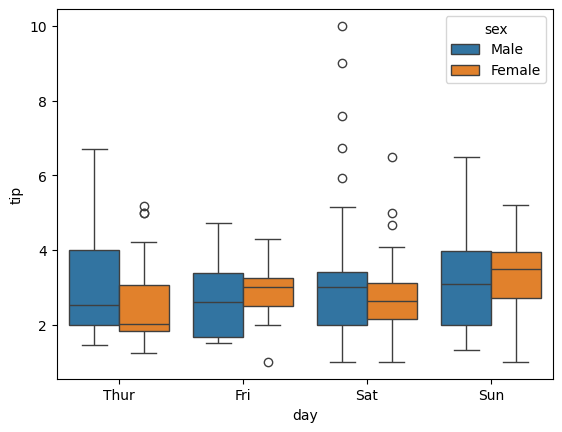

In [16]:
sns.boxplot(data=tips, x='day', y='tip', hue='sex')
plt.show()

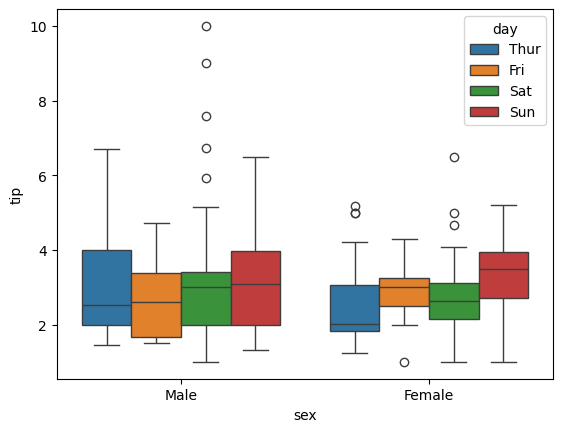

In [17]:
sns.boxplot(data=tips, x='sex', y='tip', hue='day')
plt.show()

## 2개 이상의 Axes 사용하기

Figure에 Axes(nrows=1, ncol=2) 2개를 생성하고, 성별 tip의 box plot과 시간별 tip의 box plot을 그리세요.

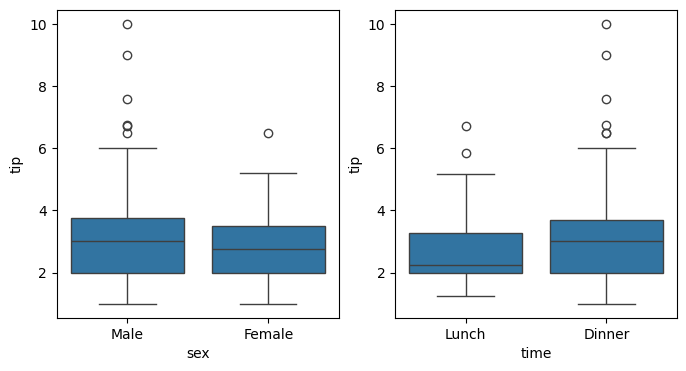

In [23]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

sns.boxplot(data=tips, x='sex', y='tip', ax=axes[0])
sns.boxplot(data=tips, x='time', y='tip', ax=axes[1])

plt.show()

# Histogram(히스토그램)

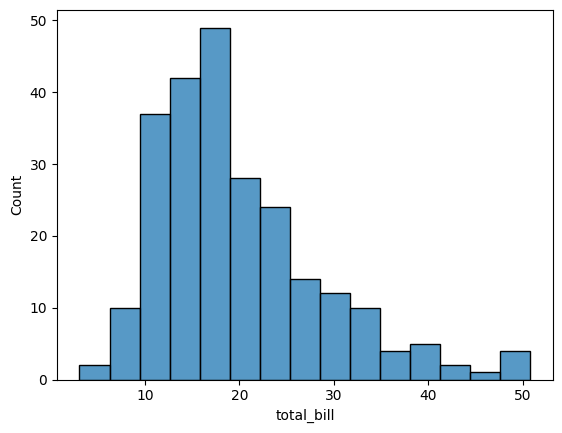

In [26]:
sns.histplot(data=tips, x='total_bill', bins=15)
plt.show()

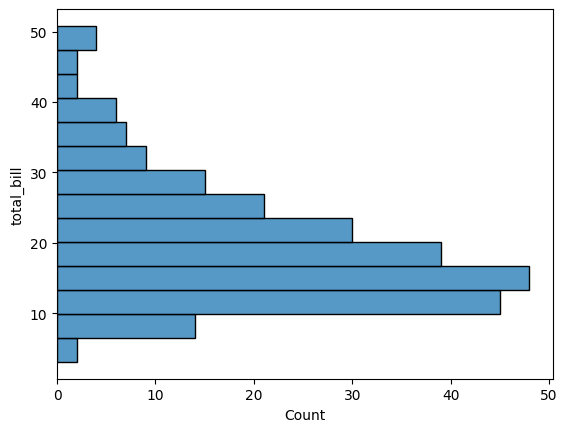

In [27]:
sns.histplot(data=tips, y='total_bill')
plt.show()

Figure, Axes(nrows=2, ncols=1) 2개를 생성, 위쪽에는 tip의 box plot, 아래쪽에는 tip의 hitogram을 그리세요.

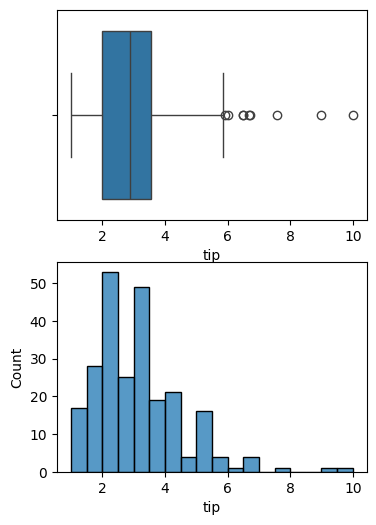

In [31]:
fig, axes = plt.subplots(nrows=2, figsize=(4, 6))

sns.boxplot(data=tips, x='tip', ax=axes[0])
sns.histplot(data=tips, x='tip', ax=axes[1])

plt.show()

# 막대 그래프

## `countplot()`

카테고리(범주) 타입 변수의 빈도수를 막대로 시각화.

In [32]:
tips.sex.value_counts()

,count
sex,
Male,157
Female,87


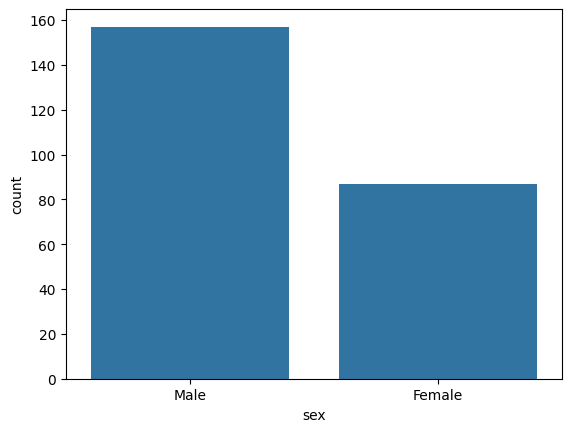

In [33]:
sns.countplot(data=tips, x='sex')
plt.show()

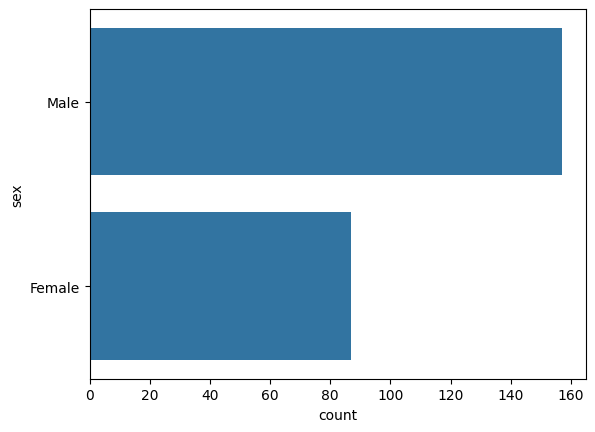

In [34]:
sns.countplot(data=tips, y='sex')
plt.show()

요일별 빈도수 막대 그래프

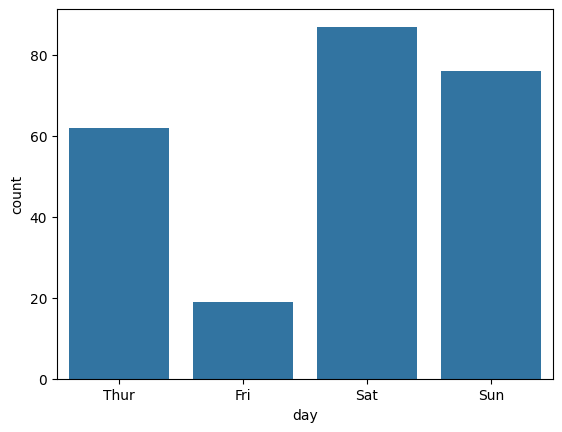

In [38]:
sns.countplot(data=tips, x='day')
plt.show()

In [36]:
tips.day.value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


요일별 성별 빈도수 막대 그래프

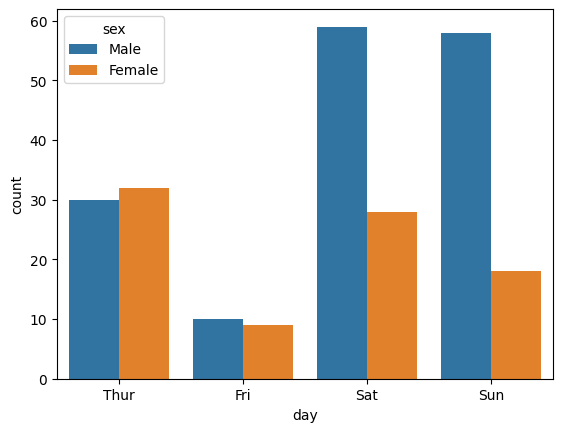

In [39]:
sns.countplot(data=tips, x='day', hue='sex')
plt.show()

In [43]:
days = tips.day.cat.categories
for d in days:
    print(f'--- {d} ---')
    subset = tips[tips.day == d]
    print(subset.sex.value_counts())

--- Thur ---
sex
Female    32
Male      30
Name: count, dtype: int64
--- Fri ---
sex
Male      10
Female     9
Name: count, dtype: int64
--- Sat ---
sex
Male      59
Female    28
Name: count, dtype: int64
--- Sun ---
sex
Male      58
Female    18
Name: count, dtype: int64


In [48]:
# data_frame.groupby([cat1, cat2, ...]).column_name.stat_func()
tips.groupby(by=['day', 'sex']).sex.count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: sex, dtype: int64

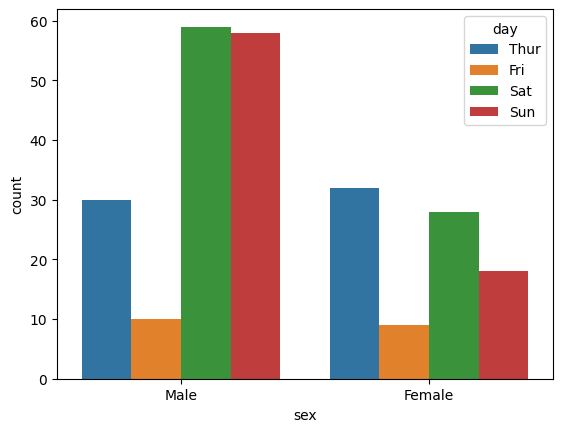

In [40]:
sns.countplot(data=tips, x='sex', hue='day')
plt.show()

In [49]:
tips.groupby(by=['sex', 'day']).day.count()

sex     day 
Male    Thur    30
        Fri     10
        Sat     59
        Sun     58
Female  Thur    32
        Fri      9
        Sat     28
        Sun     18
Name: day, dtype: int64

성별 흡연여부별 빈도수 막대 그래프

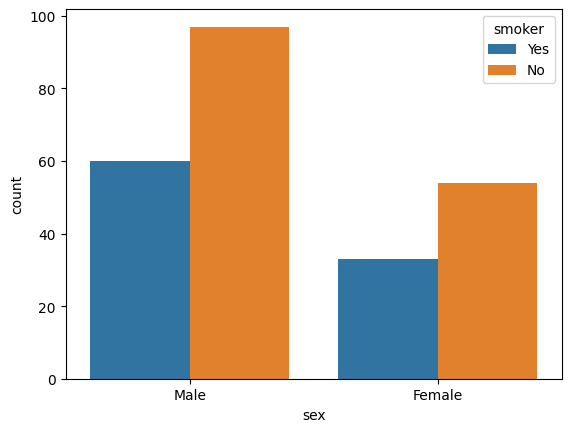

In [50]:
sns.countplot(data=tips, x='sex', hue='smoker')
plt.show()

In [51]:
tips.groupby(by=['sex', 'smoker']).smoker.count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: smoker, dtype: int64